## Import Libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Reading Data

In [2]:
data = pd.read_csv("C:/Users/zakar/Desktop/Fraud_detection_API/data/fraudTrain.csv")

In [3]:
data.sample(1).T

,114942
Unnamed: 0,114942
trans_date_trans_time,2019-03-06 04:52:36
cc_num,4713464490314802
merchant,"fraud_Lockman, West and Runte"
category,grocery_pos
amt,99.61
first,Wesley
last,Parker
gender,M
street,7452 Browning Port


In [4]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
df.shape

(1296675, 23)

## Check Target Imbalance

In [11]:
target = df["is_fraud"]

In [22]:
(target.value_counts()/df.shape[0]).apply(lambda x:round(x,3))

is_fraud
0    0.994
1    0.006
Name: count, dtype: float64

In [23]:
X = df.drop(columns=["is_fraud"])
y = target

In [25]:
# using under_sampling technique to reduce the number of observations from class 1
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(sampling_strategy=1)
X,y = under_sample.fit_resample(X,y)

In [29]:
(y.value_counts()/y.shape[0]).apply(lambda x:round(x,3))

is_fraud
0    0.5
1    0.5
Name: count, dtype: float64

In [44]:
new_df = pd.concat([X,y],axis=1)

## Explore Data

In [52]:
new_df.drop(columns=["Unnamed: 0"],inplace=True)

In [58]:
# get num and cat columns names
num_col = []
cat_col = []
for i in new_df.columns:
    if new_df[i].dtype in ["int64","float64"]:
        num_col.append(i)
    else:
        cat_col.append(i)
num_col.pop()

'is_fraud'

In [64]:
num_col

['cc_num',
 'amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long']

In [65]:
cat_col

['trans_date_trans_time',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'dob',
 'trans_num']

In [72]:
new_df.drop(columns=["cc_num","zip","merchant","first","last","street","trans_num"],inplace=True)

In [93]:
# get num and cat columns names
num_col = []
cat_col = []
for i in new_df.columns:
    if new_df[i].dtype in ["int64","float64"]:
        num_col.append(i)
    else:
        cat_col.append(i)

In [82]:
num_col

['amt',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

In [85]:
new_df[num_col].corr()["is_fraud"]

amt           0.594857
lat           0.008422
long          0.006206
city_pop      0.026008
unix_time    -0.022220
merch_lat     0.007127
merch_long    0.006362
is_fraud      1.000000
Name: is_fraud, dtype: float64

<Axes: >

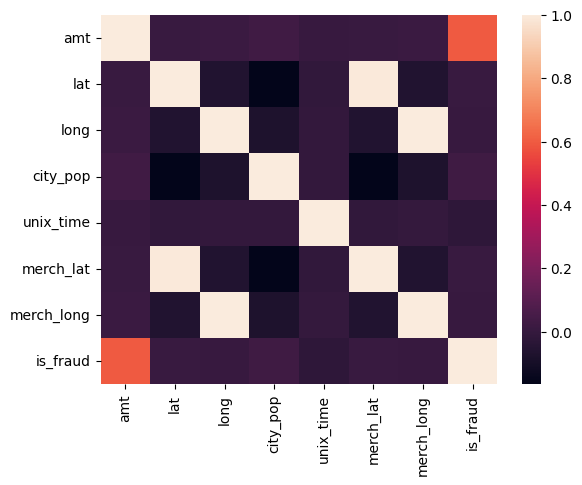

In [83]:
sns.heatmap(new_df[num_col].corr())

In [99]:
cat_col

['category', 'gender', 'city', 'state', 'job', 'dob']

In [106]:
for i in cat_col:
    print(new_df.groupby(i)["is_fraud"].mean())

category
entertainment     0.294564
food_dining       0.226387
gas_transport     0.442693
grocery_net       0.332506
grocery_pos       0.712883
health_fitness    0.208791
home              0.220736
kids_pets         0.265556
misc_net          0.723320
misc_pos          0.359195
personal_care     0.293333
shopping_net      0.750329
shopping_pos      0.551341
travel            0.328612
Name: is_fraud, dtype: float64
gender
F    0.478908
M    0.522806
Name: is_fraud, dtype: float64
city
Achille                      0.866667
Acworth                      0.520000
Adams                        0.000000
Afton                        0.428571
Akron                        0.000000
                               ...   
Woods Cross                  0.000000
Woodville                    0.000000
Yellowstone National Park    0.750000
Zaleski                      0.631579
Zavalla                      0.000000
Name: is_fraud, Length: 891, dtype: float64
state
AK    0.818182
AL    0.485327
AR    0.47633

In [108]:
# variables use in train : amt,gender,category
claned_df = new_df[["amt","gender","category","is_fraud"]]

In [109]:
claned_df.head(5)

,amt,gender,category,is_fraud
10179,92.15,M,gas_transport,0
1183464,54.71,M,food_dining,0
841996,1.83,F,shopping_pos,0
1269333,63.55,M,grocery_pos,0
1116233,11.77,F,health_fitness,0


In [111]:
claned_df.to_csv("data/claned_data.csv")

OSError: Cannot save file into a non-existent directory: 'data'